## Cvičenie 1

Na cvičeniach si budeme často generovať <b>náhodné dáta</b> s požadovanými vlastnosťami. Pri
generovaní je vhodné si najprv nastaviť inicializáciu generátora náhodných čísel (inak by sa vygenerovali pri každom spustení rozdielne dáta). 

Nasledujúci príklad vygeneruje náhodný vektor 100 hodnôt podľa normálneho rozdelenia s 0 strednou hodnotou a štandardnou
odchýlkou 0.5:

In [ ]:
set.seed(1234)
x <- rnorm(100, mean=0, sd=0.5)
print(x)

Hodnoty môžeme vypočítať aj zadaním funkcie. 

Nasledujúce príkazy vygenerujú postupnosť čísel `x od 0 do 10 s krokom 0.5` pre ktorú vypočítajú hodnoty lineárnej funkcie `y = 3 x + 2`.

In [1]:
x <- seq(from=0, to=10, by=0.5)
print(x)

 [1]  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0
[16]  7.5  8.0  8.5  9.0  9.5 10.0


In [2]:
f <- function(x) { 3*x + 2 }
y <- sapply(x,f)
print(y)

 [1]  2.0  3.5  5.0  6.5  8.0  9.5 11.0 12.5 14.0 15.5 17.0 18.5 20.0 21.5 23.0
[16] 24.5 26.0 27.5 29.0 30.5 32.0


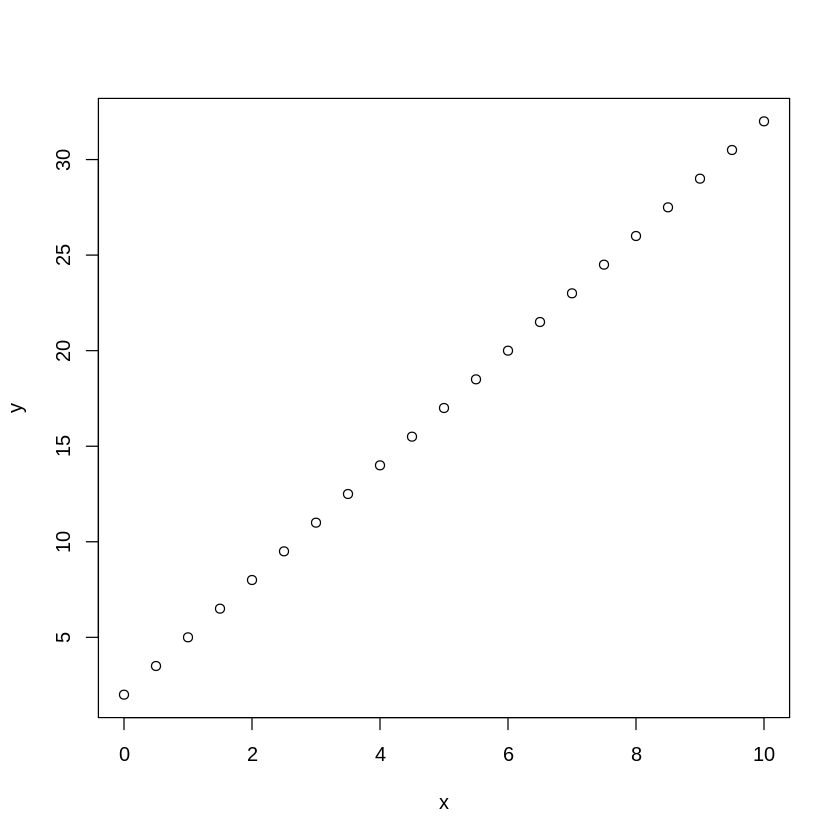

In [3]:
plot(y ~ x)

K vygenerovaným dátam môžeme pridať náhodný šum s požadovaným rozdelením pravdepodobnosti. 

Nasledujúci príklad vygeneruje náhodný vektor s uniformným rozdelením s intervalom `[-1,1]`, ktorý pripočíta k hodnotám `y`.

In [4]:
noise <- runif(length(y), min=-1, max=10)
print(noise)

 [1]  7.52698706  0.27512674  2.03398927  0.51447578  0.96267533 -0.84227801
 [7]  8.73553032  3.29749417 -0.04911542  0.20660028  2.27289668  8.05177967
[13]  0.92845274  7.66941037  0.35847661 -0.51241216  1.38675580  8.73788305
[19]  5.63082216 -0.20652122  4.93713598


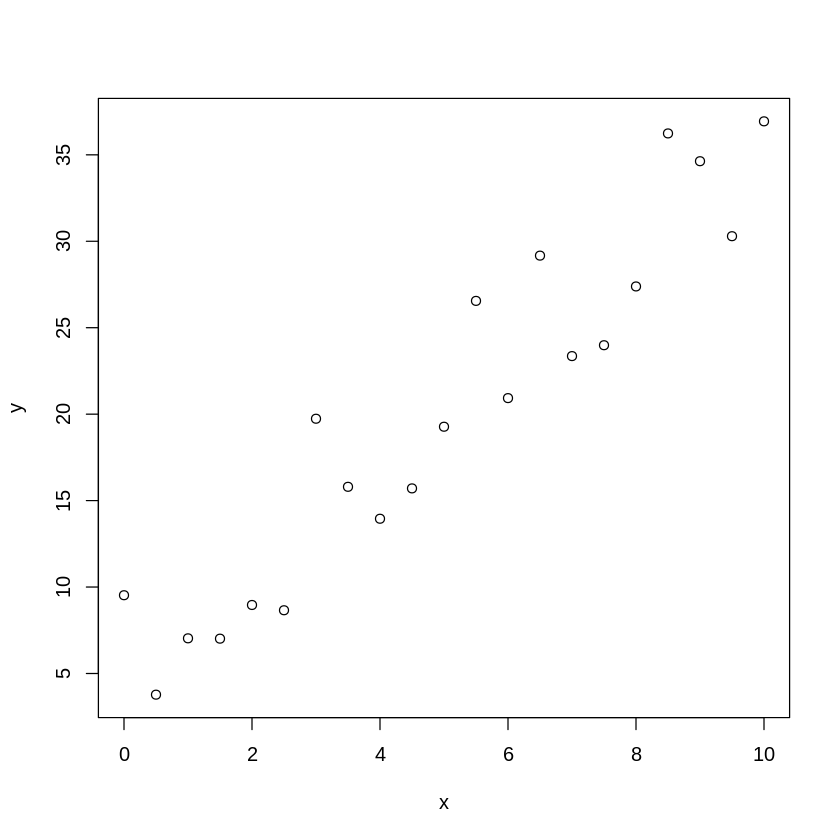

In [5]:
y <- y + noise
plot(y ~ x)

### Inštalácia príkladov

Na cvičení budete pracovať s dátami, ktoré sú súčasťou balíka `"AER"`. Balík `"AER"` obsahuje
dátové súbory pripravené pre publikáciu `Applied Econometrics with R`.

Nasledujúce príkazy nainštalujú balík do prostredia R a načítajú dátovú množinu`CPS1985`. Dátovú množinu si premenujeme na `cps`.

In [7]:
install.packages("AER", repos='http://cran.us.r-project.org')
data("CPS1985", package="AER")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [8]:
cps <- CPS1985

Popis dátovej množiny môžete získať príkazom `str`. Príkaz head vypíše niekoľko prvých
záznamov. Dáta obsahujú demografické údaje z prieskumu obyvateľstva z mája roku 1985
a obsahujú základné atribúty ako napr. príjem (`wage`), stupeň vzdelania, vek, atď.

In [9]:
str(cps)

'data.frame':	534 obs. of  11 variables:
 $ wage      : num  5.1 4.95 6.67 4 7.5 ...
 $ education : num  8 9 12 12 12 13 10 12 16 12 ...
 $ experience: num  21 42 1 4 17 9 27 9 11 9 ...
 $ age       : num  35 57 19 22 35 28 43 27 33 27 ...
 $ ethnicity : Factor w/ 3 levels "cauc","hispanic",..: 2 1 1 1 1 1 1 1 1 1 ...
 $ region    : Factor w/ 2 levels "south","other": 2 2 2 2 2 2 1 2 2 2 ...
 $ gender    : Factor w/ 2 levels "male","female": 2 2 1 1 1 1 1 1 1 1 ...
 $ occupation: Factor w/ 6 levels "worker","technical",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sector    : Factor w/ 3 levels "manufacturing",..: 1 1 1 3 3 3 3 3 1 3 ...
 $ union     : Factor w/ 2 levels "no","yes": 1 1 1 1 1 2 1 1 1 1 ...
 $ married   : Factor w/ 2 levels "no","yes": 2 2 1 1 2 1 1 1 2 1 ...


In [10]:
head(cps)

wage  education experience age ethnicity region gender occupation
1     5.10  8        21         35  hispanic  other  female worker    
1100  4.95  9        42         57  cauc      other  female worker    
2     6.67 12         1         19  cauc      other  male   worker    
3     4.00 12         4         22  cauc      other  male   worker    
4     7.50 12        17         35  cauc      other  male   worker    
5    13.07 13         9         28  cauc      other  male   worker    
     sector        union married
1    manufacturing no    yes    
1100 manufacturing no    yes    
2    manufacturing no    no     
3    other         no    no     
4    other         no    yes    
5    other         yes   no

Príkazom attach si vytvoríme odkazy na stĺpce dátovej množiny, aby sme sa na nich mohli
priamo odkazovať.

In [11]:
attach(cps)

### Základné štatistiky pre číselné atribúty

Prehľadové základné štatistiky pre číselné atribúty je možné vypísať príkazom summary.
Jednotlivé štatistiky môžeme vypočítať aj samostatne funkciami `mean` (priemer), `sd`
(štandardná odchýlka), `var` (variancia), atď. Nasledujúce príkazy vypočítajú základné štatistiky
pre príjem.

In [12]:
summary(wage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.250   7.780   9.024  11.250  44.500 

In [15]:
mean(wage)

[1] 9.024064

In [16]:
sd(wage)

[1] 5.139097

In [17]:
var(wage)

[1] 26.41032

Graficky si môžeme zobraziť `histogram` hodnôt. Štandardne sa na histograme zobrazí početnosť
príkladov, ktoré spadajú do daného rozsahu histogramu. Ak chceme zobraziť iba odhad
pravdepodobnosti (počet príkladov s hodnotami v danom rozsahu \ celkový počet príkladov),
parameter `freq` nastavíme na `FALSE`. Hodnoty pravdepodobnosti môžeme aproximovať
funkciou hustoty `density`. Nasledujúce príkazy vykreslia histogram s aproximovanou funkciou
hustoty.

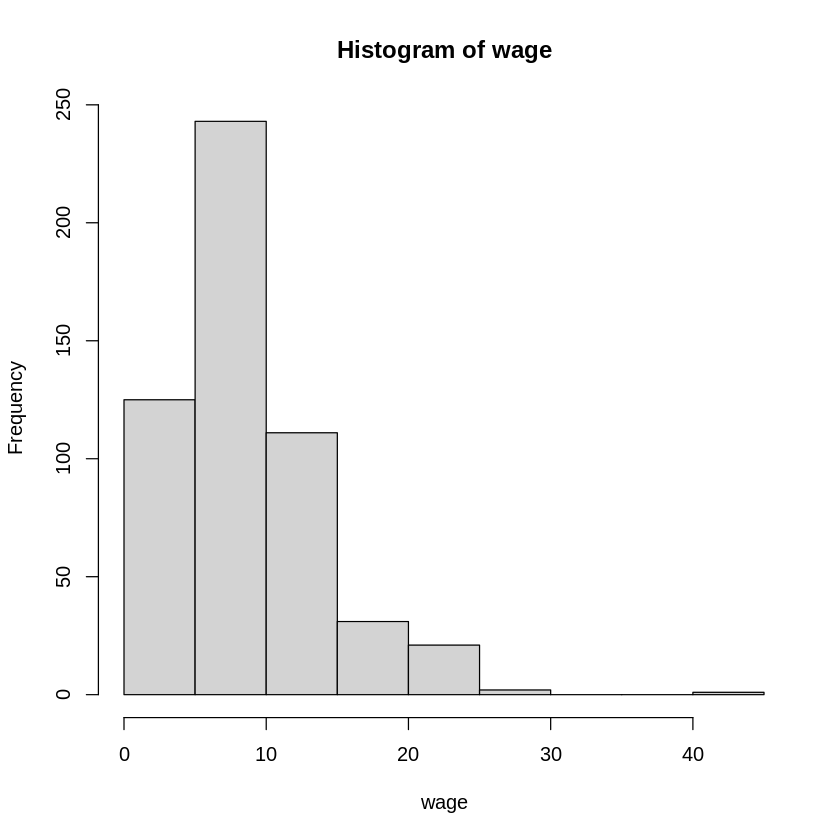

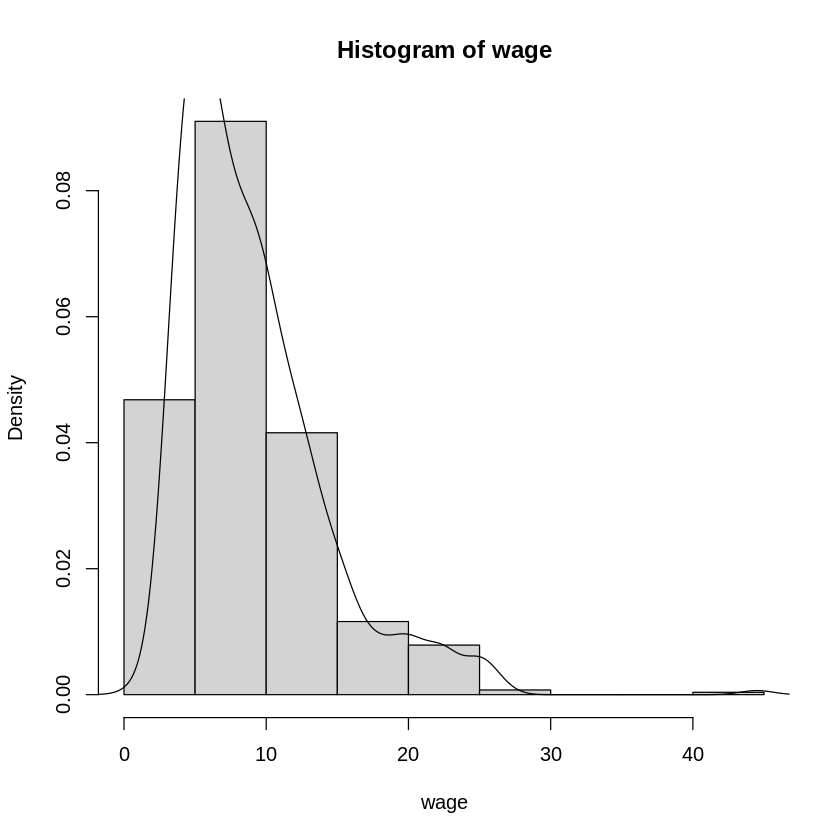

In [18]:
hist(wage)
hist(wage, freq=FALSE)
lines(density(wage))

Aproximovaná funkcia hustoty nám slúži napr. na lepšie vizuálne porovnanie či majú hodnoty
normálne rozdelenie, ktoré má nasledujúci priebeh:

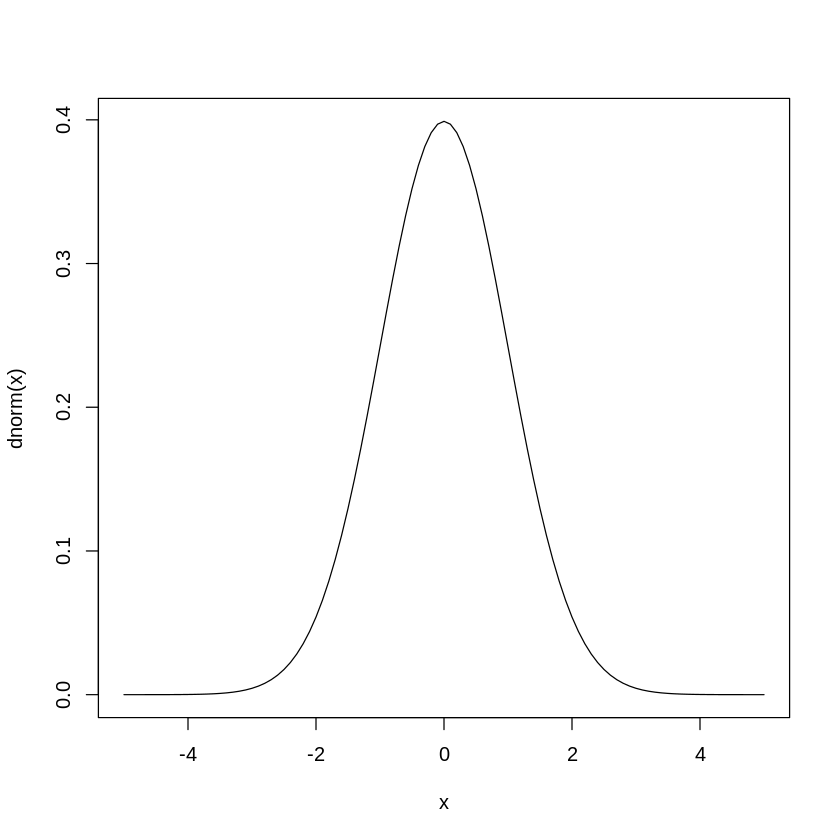

In [19]:
curve(dnorm, from=-5, to=5)

Dáta za príjem sú vychýlené k nižším hodnotám (tzn. väčší počet ľudí má menší plat). Aby sme
dáta normalizovali, skúsime ich transformovať logaritmickou funkciou. Nasledujúce príkazy
vykreslia histogram a aproximovanú funkciu hustoty pre logaritmicky transformované dáta.

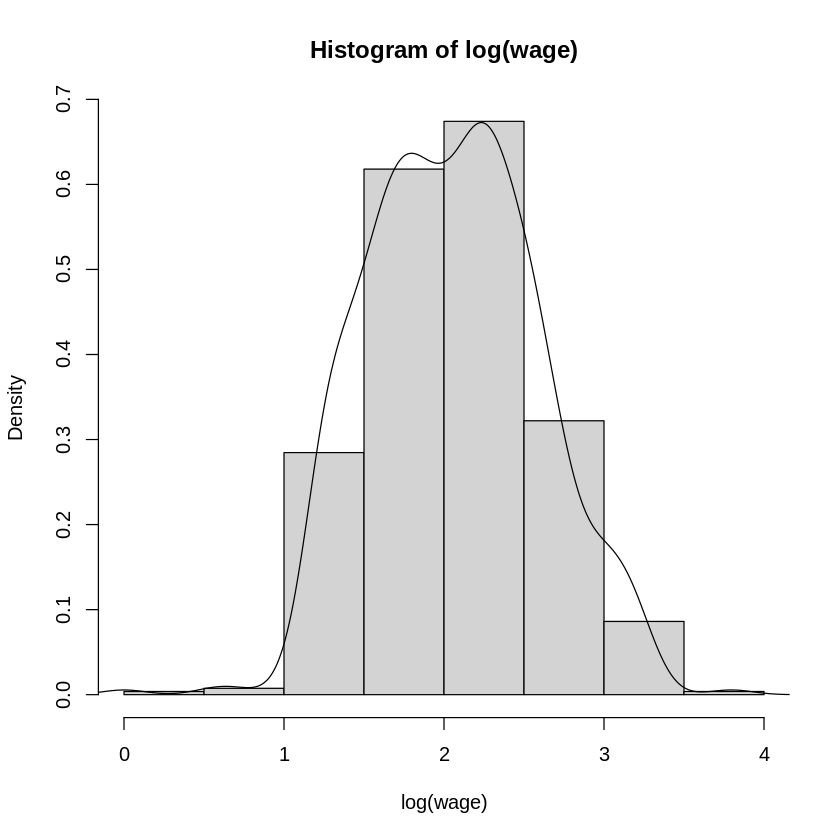

In [20]:
hist(log(wage), freq=FALSE)
lines(density(log(wage)))

### Základné štatistiky pre faktory (nominálne resp. ordinálne atribúty)

Pre faktory prehľad zobrazí početnosť jednotlivých hodnôt, ktoré je možné graficky zobraziť
stĺpcovým grafom.

worker  technical   services     office      sales management 
       156        105         83         97         38         55

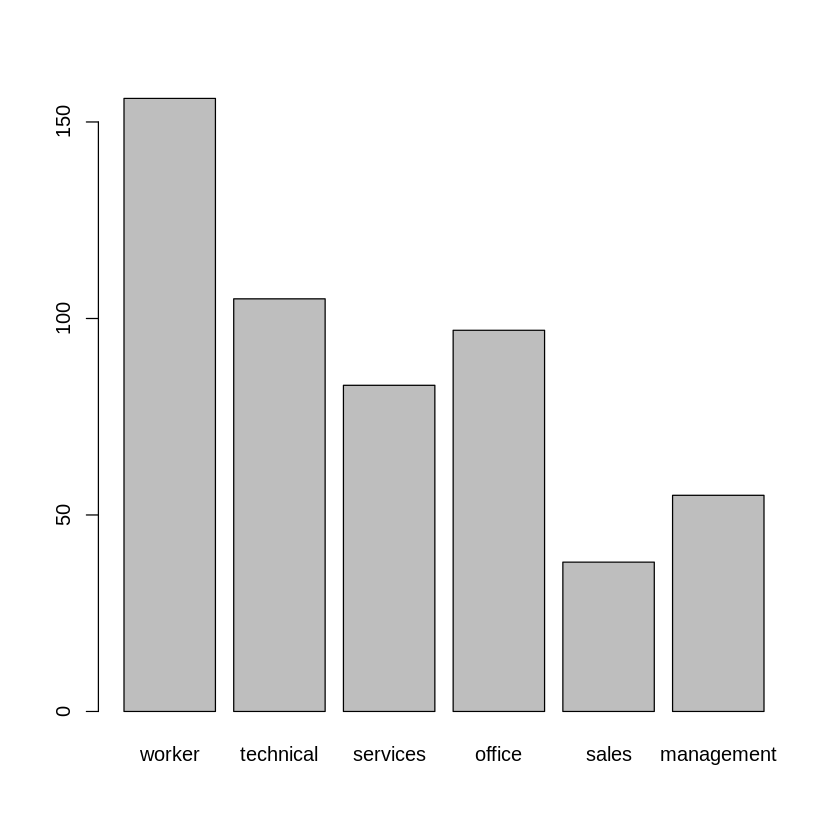

In [21]:
summary(occupation)
barplot(table(occupation))

### Závislosti medzi dvoma číselnými atribútmi

Základnou štatistikou je korelačný koeficient, ktorý meria lineárnu závislosť medzi dvoma
číselnými atribútmi. Nasledujúce príkazy vypočítajú korelačný koeficient medzi príjmom
a vzdelaním. Závislosť si môžeme zobraziť aj graficky kde môžeme potvrdiť linearitu.

[1] 0.9779612

[1] 0.3803983

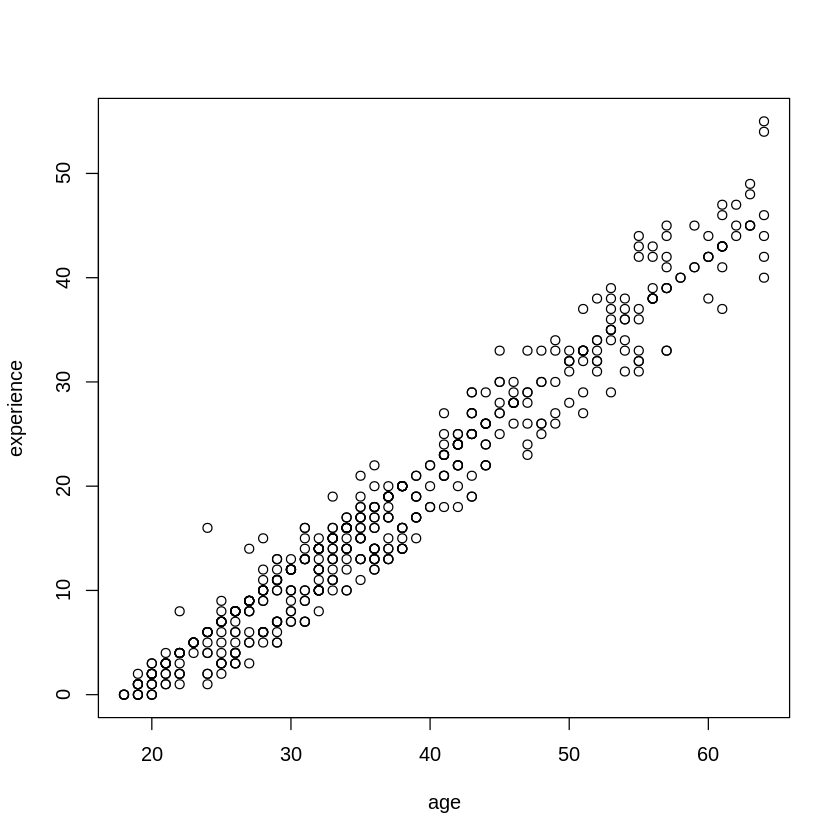

In [22]:
cor(experience, age)
cor(log(wage), education)
plot(experience ~ age)

### Závislosti medzi dvoma faktormi

Závislosť medzi dvoma faktormi môžeme zistiť z kontingenčnej tabuľky, ktorá určuje
početnosť spoločného výskytu hodnôt dvoch faktorov. Početnosť je možné prehľadne zobraziť
graficky vykreslením, napr. <b>mozaikovým grafom. </b>

        occupation
gender   worker technical services office sales management
  male      126        53       34     21    21         34
  female     30        52       49     76    17         21

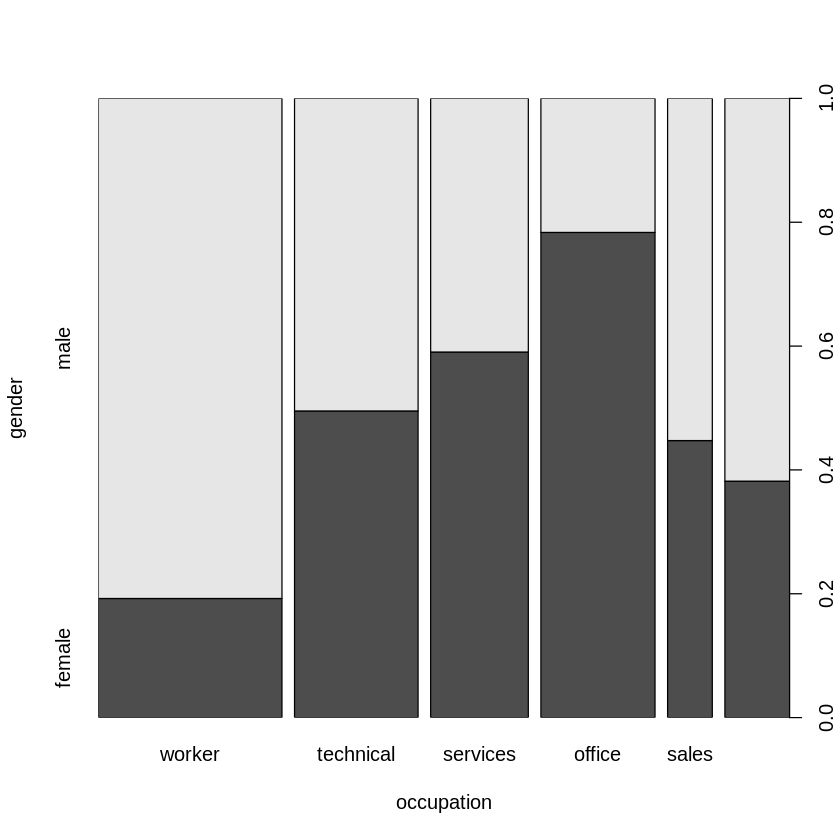

In [23]:
table(gender, occupation)
plot(gender ~ occupation)

Podobne ako sa pre číselné atribúty používa
korelačný koeficient, tak sa pre faktory používa chi-kvadrát test. Ak je kritická hodnota
`p < 0.05` atribúty sa považujú za závislé.

In [24]:
chisq.test(table(gender, occupation))


	Pearson's Chi-squared test

data:  table(gender, occupation)
X-squared = 93.486, df = 5, p-value < 2.2e-16


### Závislosti medzi jedným číselným atribútom a jedným faktorom

Pomocou funkcie tapply vieme vypočítať štatistiky číselného atribútu pre jednotlivé hodnoty
faktora, napr. nasledujúci príkaz vypočíta priemerný plat samostatne pre mužov a ženy
(hodnoty faktora `gender`). Súhrne je možné závislosti medzi číselným atribútom a faktorom
zobraziť pomocou krabicového grafu (`boxplot`).

male   female 
2.165286 1.934037

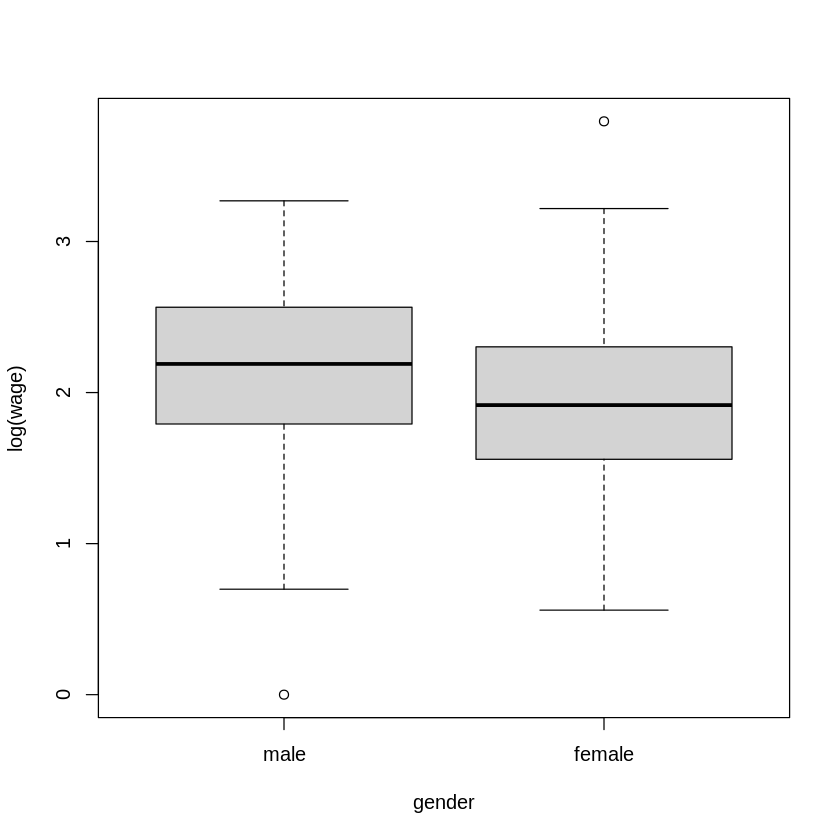

In [25]:
tapply(log(wage), gender, mean)
boxplot(log(wage) ~ gender)

Podrobnejšie je možné zobraziť graf kvantilov (`q-q plot`). Najprv si odfiltrujeme dáta podľa
pohlavia do dvoch podmnožín ktorých kvantily zobrazíme funkciou qqplot. Do grafu pridáme
aj 45st. referenčnú priamku predeľujúcu zobrazenie. Keďže väčšina kvantilov je pod referenčnou
čiarou, muži zarábajú viac.

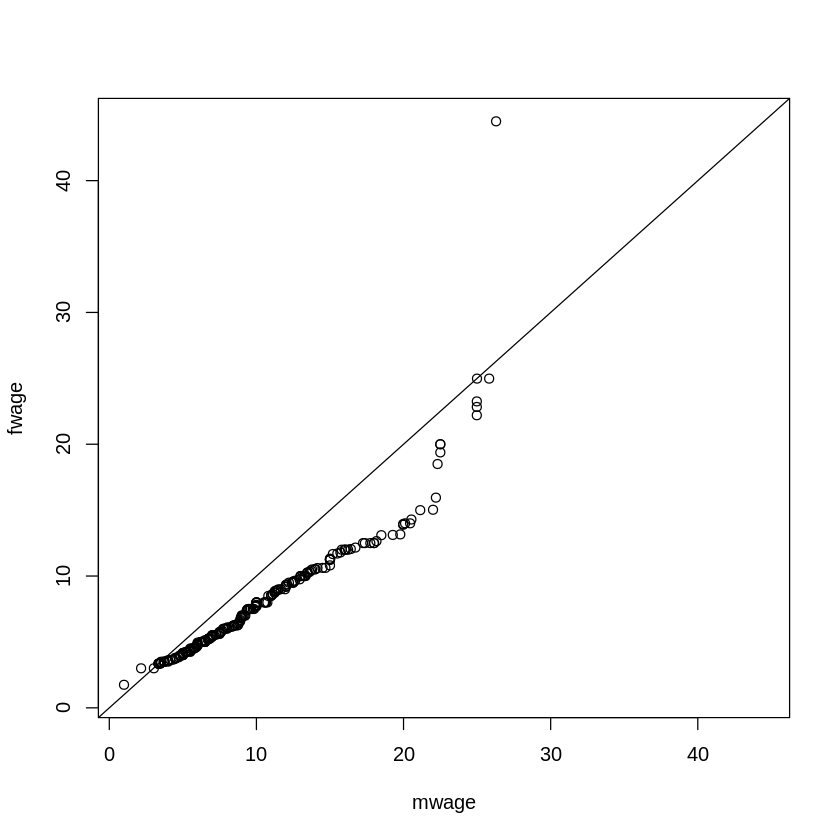

In [26]:
mwage <- subset(cps, gender == "male")$wage
fwage <- subset(cps, gender == "female")$wage
qqplot(mwage, fwage, xlim=range(wage), ylim=range(wage))
abline(0,1)

## Úlohy

**1.** Zobrazte histogramy pre všetky číselné atribúty z dátovej množiny `CPS`, zistite ktorý z
nich má približne normálne rozdelenie. Transformujte atribúty použitím logaritmickej
funkcie a zistite, či majú transformované dáta približne normálne rozdelenie.

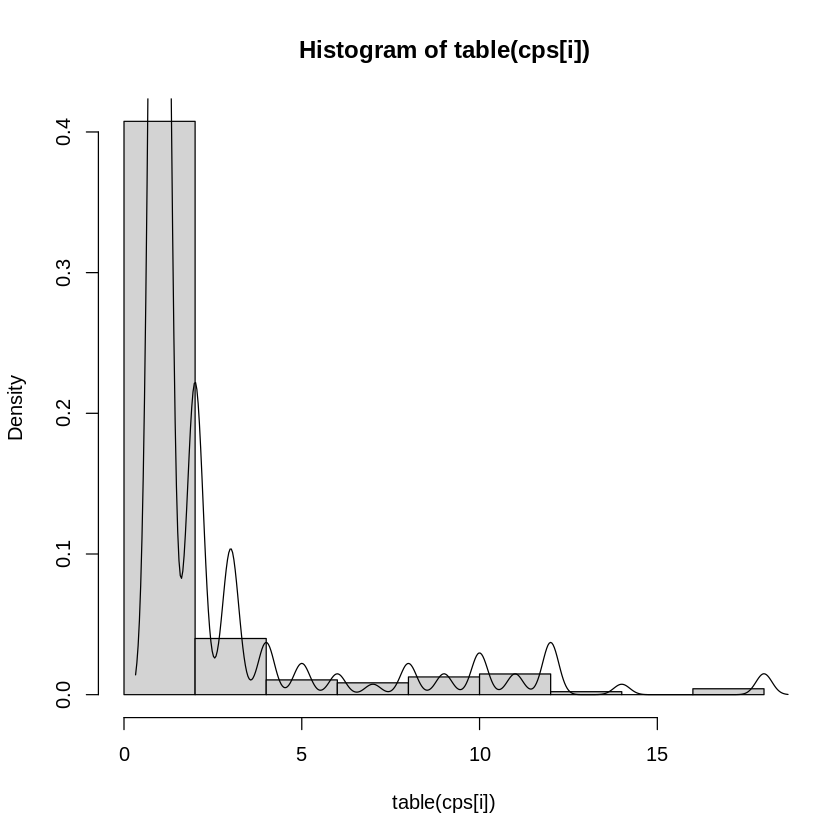

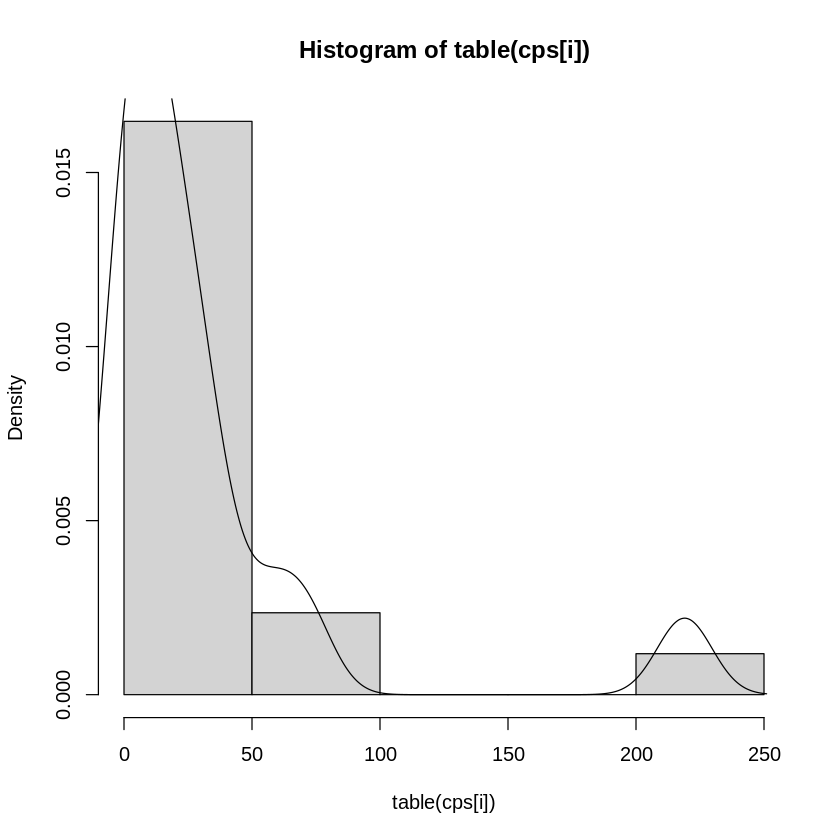

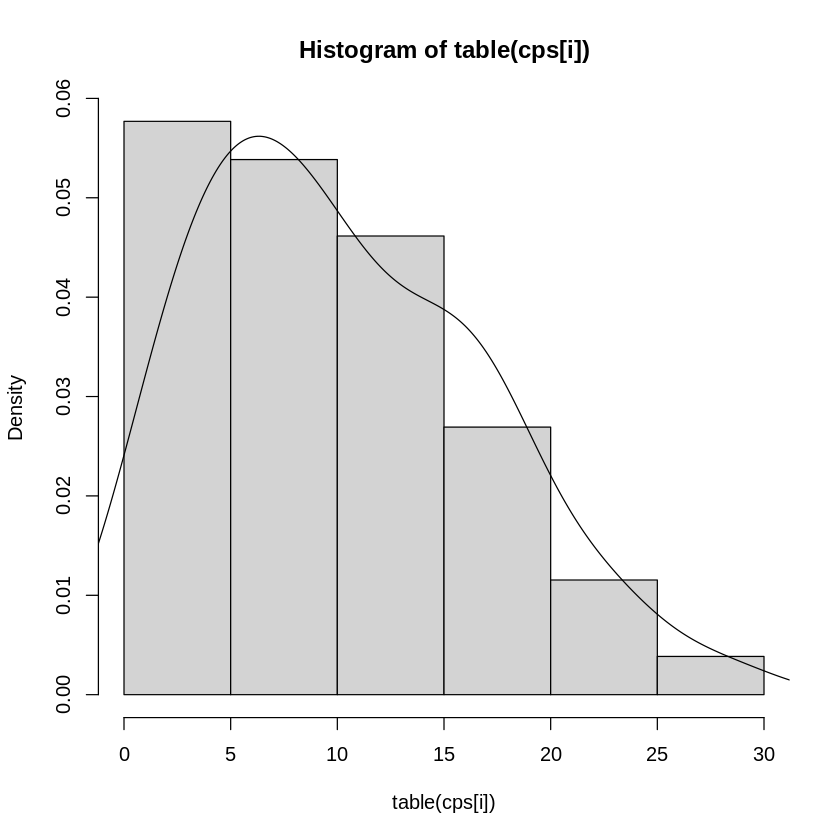

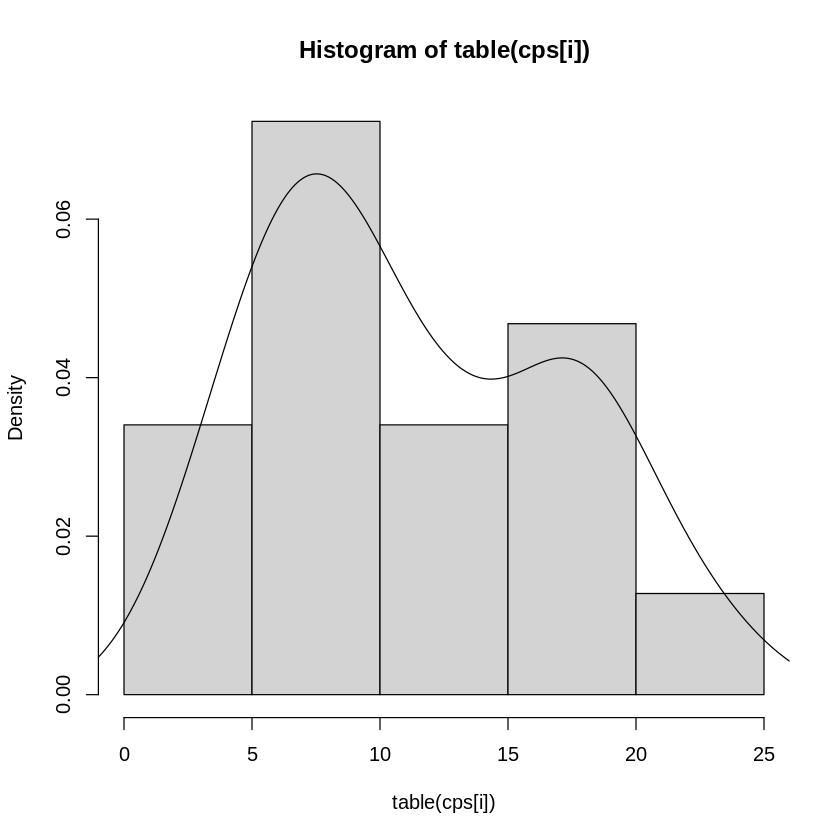

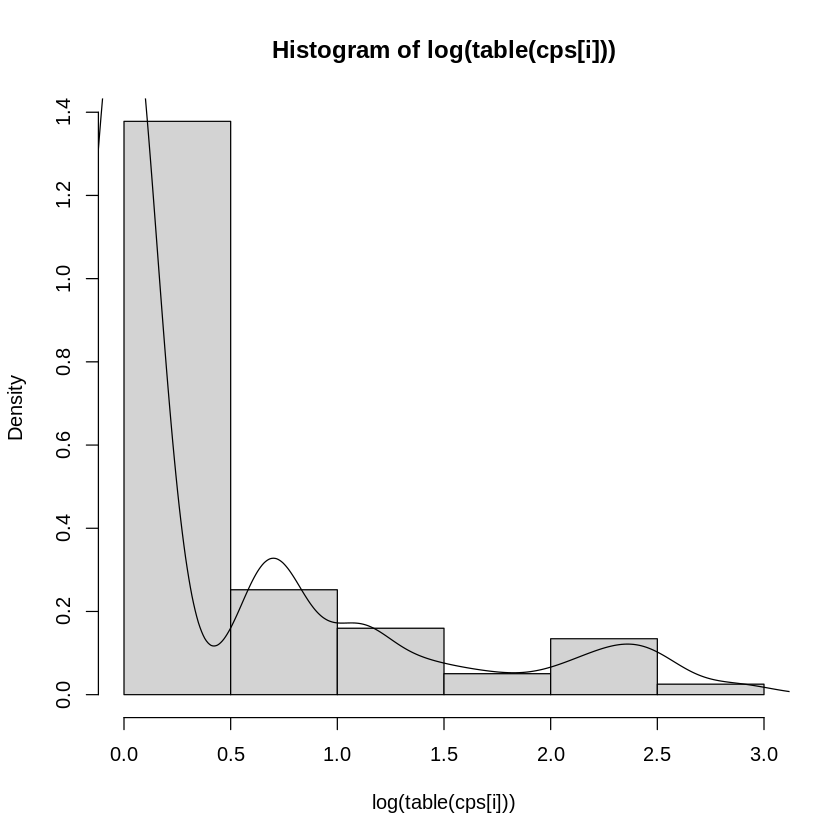

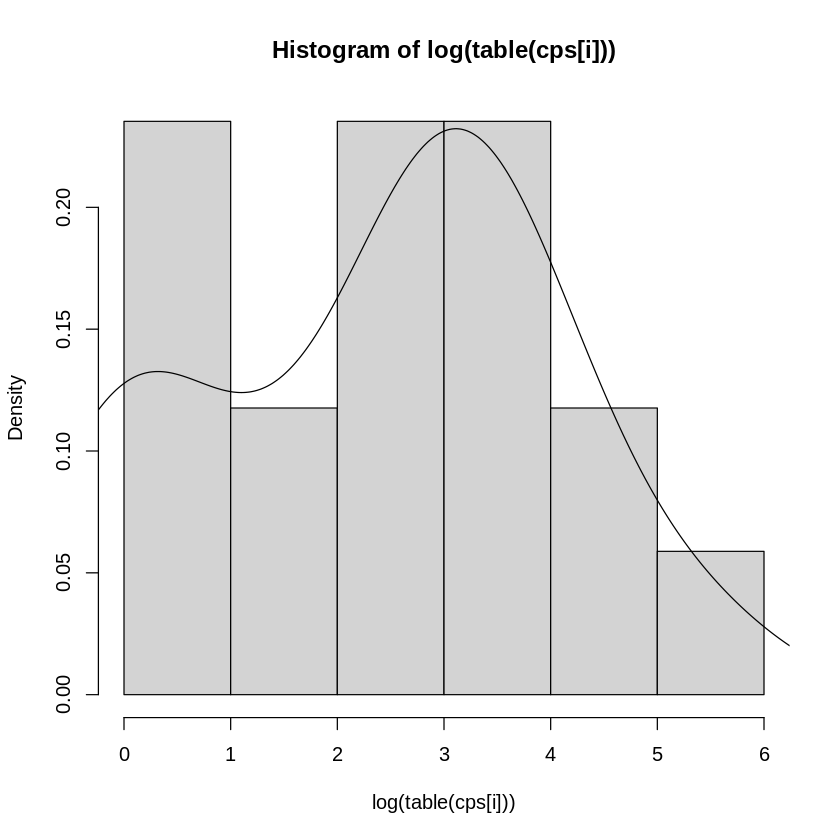

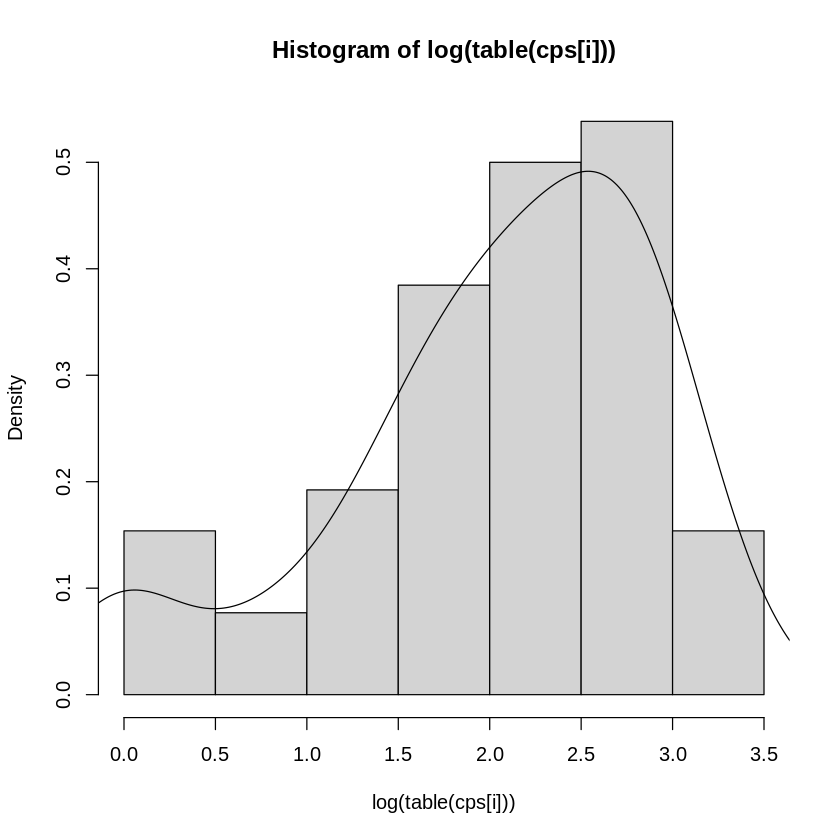

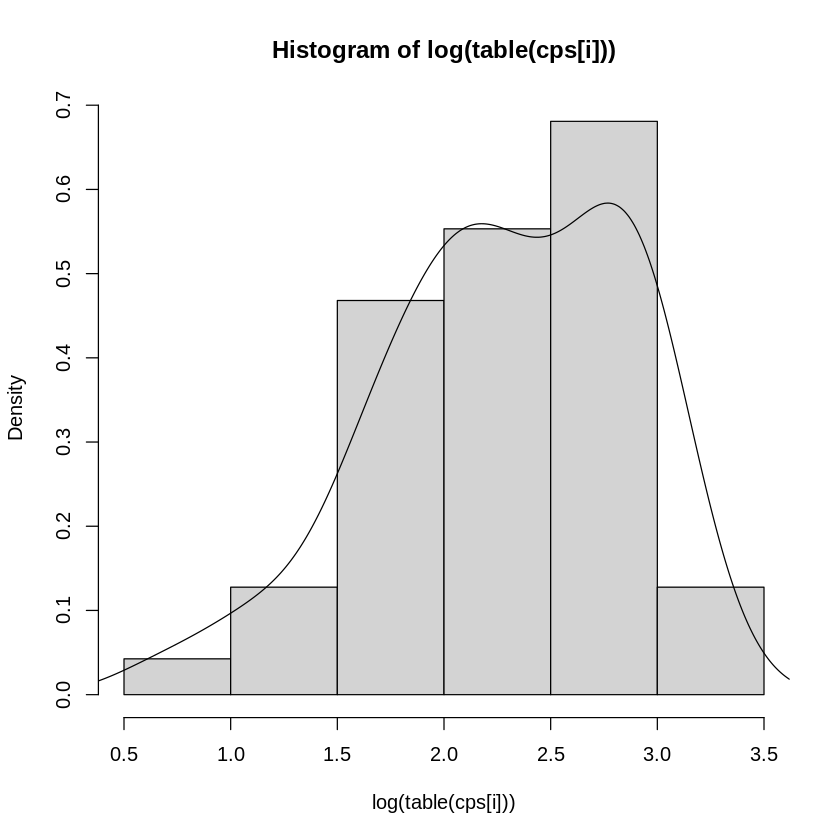

In [46]:
for (i in 1:4) {
    hist(table(cps[i]), freq=FALSE)
    lines(density(table(cps[i])))
    }

for (i in 1:4) {
    hist(log(table(cps[i])), freq=FALSE)
    lines(density(log(table(cps[i]))))
    }

**2.** Zobrazte početnosti hodnôt pre všetky faktory (nominálne resp. ordinálne atribúty).
Zistite, ktoré z týchto rozdelení je približne uniformné. Zobrazte stĺpcové grafy s
relatívnymi početnosťami (počet hodnôt/celkový počet príkladov).

cauc hispanic    other 
     440       27       67

south other 
  156   378

male female 
   289    245

worker  technical   services     office      sales management 
       156        105         83         97         38         55

manufacturing  construction         other 
           99            24           411

no yes 
438  96

no yes 
184 350

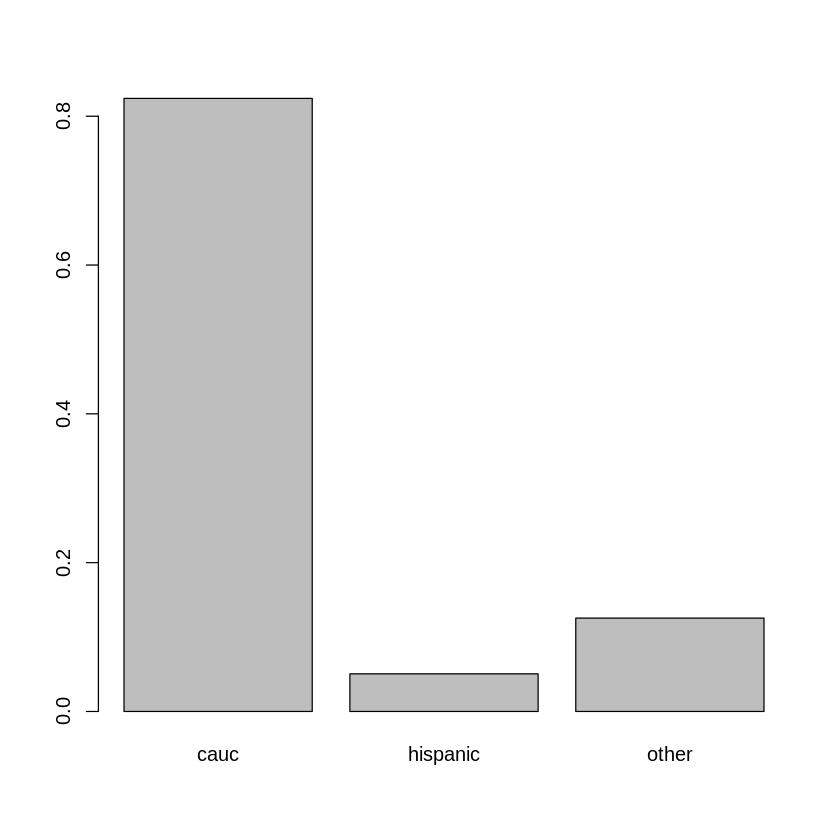

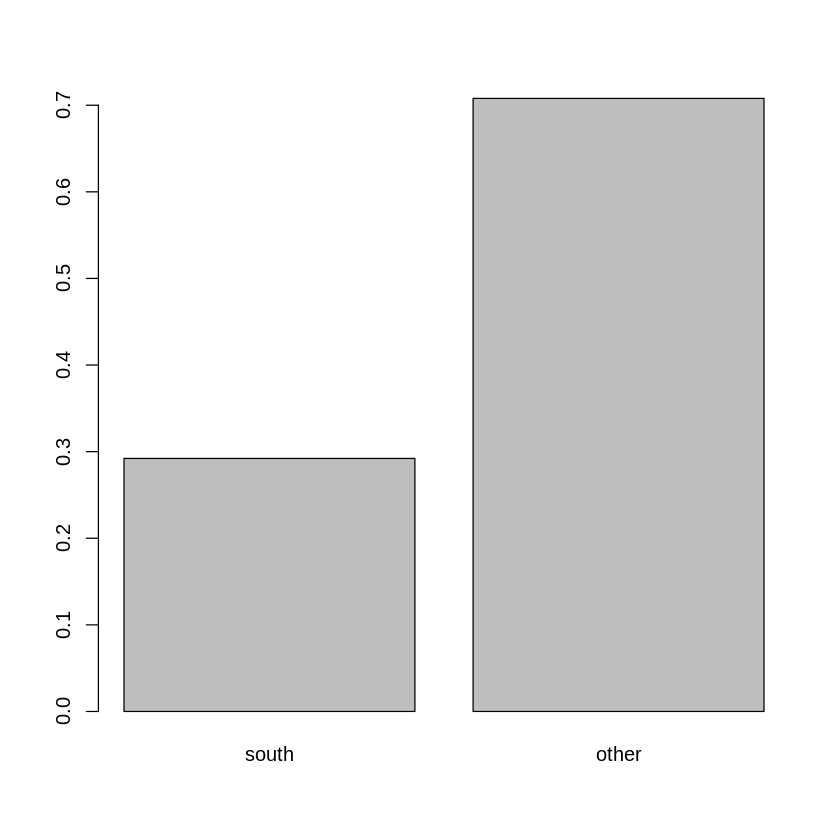

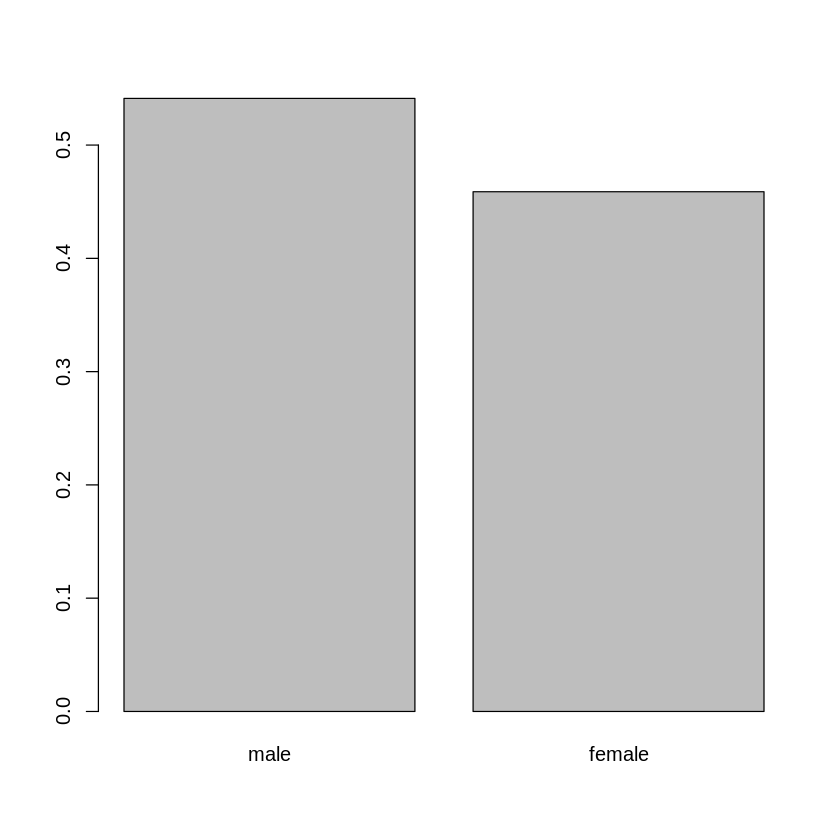

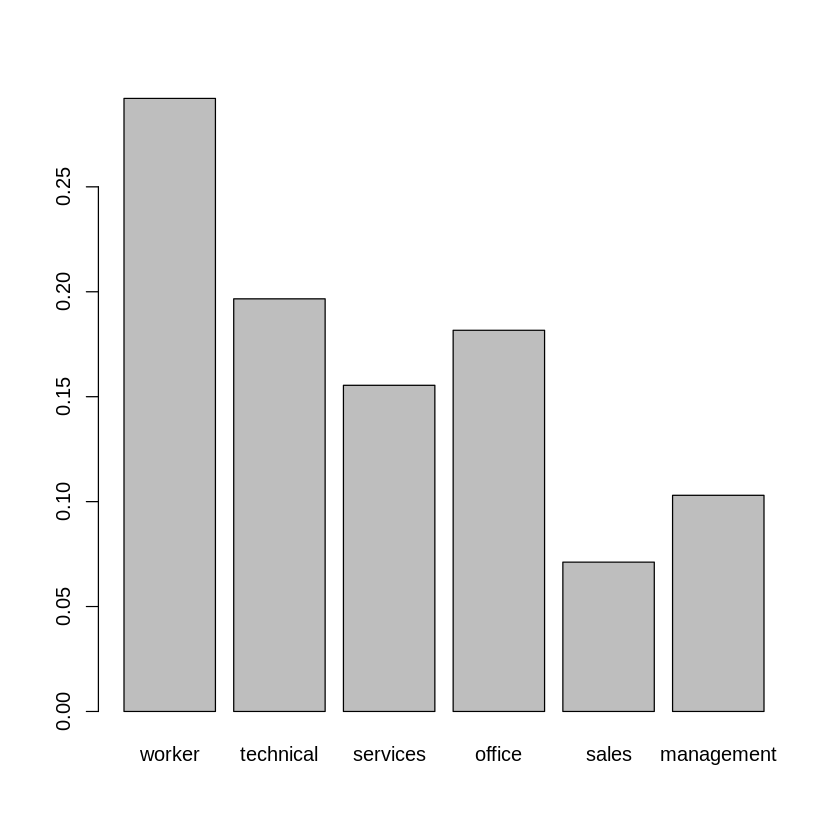

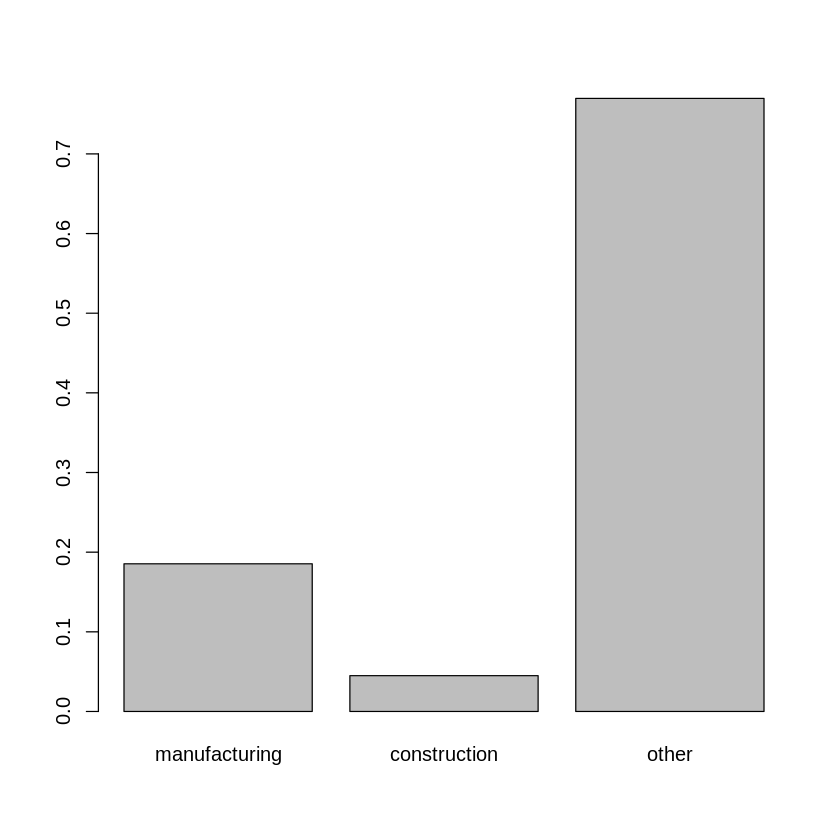

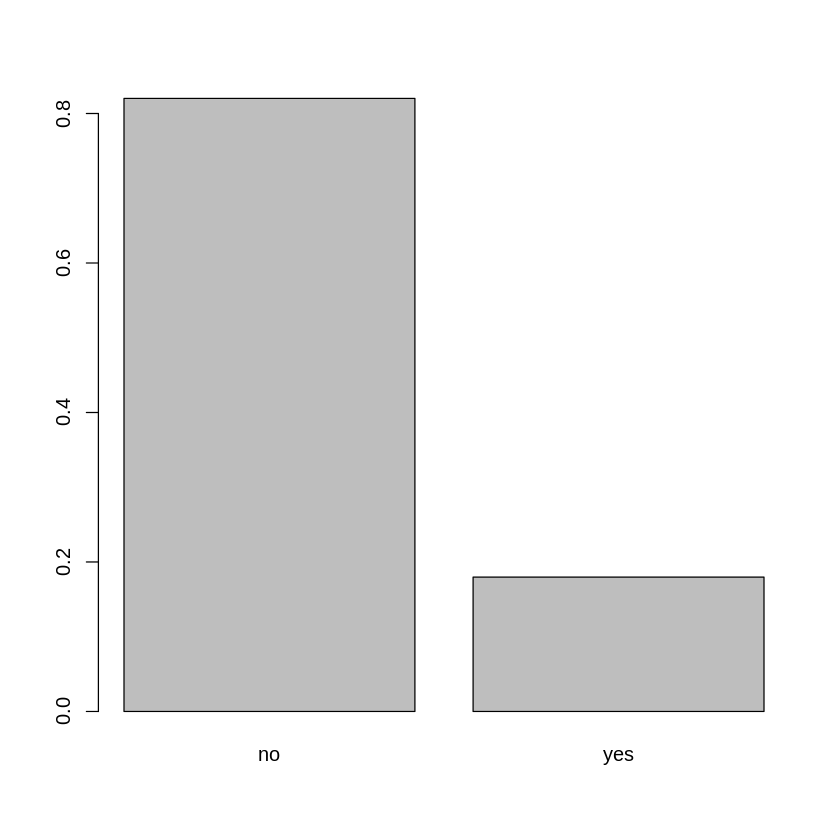

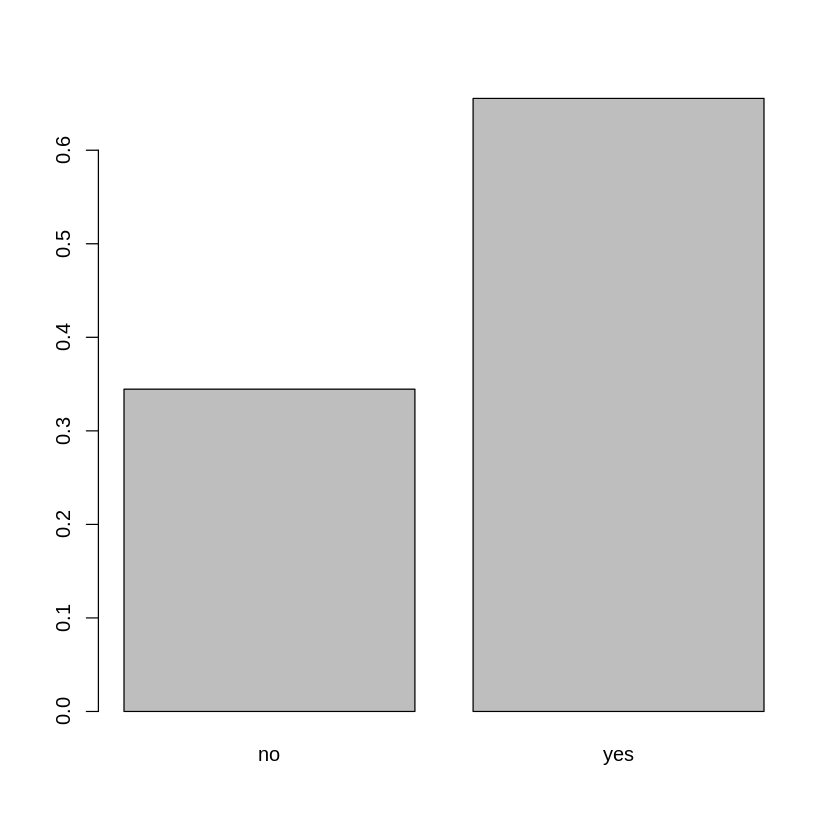

In [38]:
summary (ethnicity)
summary (region)
summary (gender)
summary (occupation)
summary (sector)
summary (union) 
summary (married)

for (i in 5:11) {
    barplot(table(cps[i])/sum(table(cps[i])))
    }

**3.** Vypočítajte korelačnú maticu medzi všetkými číselnými atribútmi pomocou funkcie cor
(číselné atribúty si môžete vybrať z množiny x použitím funkcie `x[sapply(x,
is.numeric)]`). Pre dvojicu atribútov s najväčšou koreláciou nakreslite `X-Y graf` ich
závislosti.

**4.** Vypočítajte `chi-kvadrát test` pre všetky dvojice faktorov. Pre faktory, ktoré majú
najväčšiu závislosť nakreslite mozaikový graf.

**5.** Vypočítajte a zobrazte priemernú mzdu pre všetky hodnoty a všetky faktory samostatne.
Pre vypočítané hodnoty zobrazte krabicové grafy. Zistite kde sú najväčšie rozdiely v
platoch a pre danú závislosť nakreslite `q-q graf`.

**6.** Vygenerujte náhodné vektory `x` a `y` o veľkosti `100` hodnôt z normálneho rozdelenia so
`strednou hodnotou 1` a `štandardnou odchýlkou 2`. Zobrazte ich závislosť na `X-Y grafe` a
vypočítajte korelačný koeficient. Pridajte do oboch vektorov jednu extrémnu hodnotu
(napr. `10`, `20`) pomocou funkcie `c()`. Vypočítajte korelačný koeficient na zmenených
dátach a zobrazte `X-Y závislosť`.

[1] -0.02538285

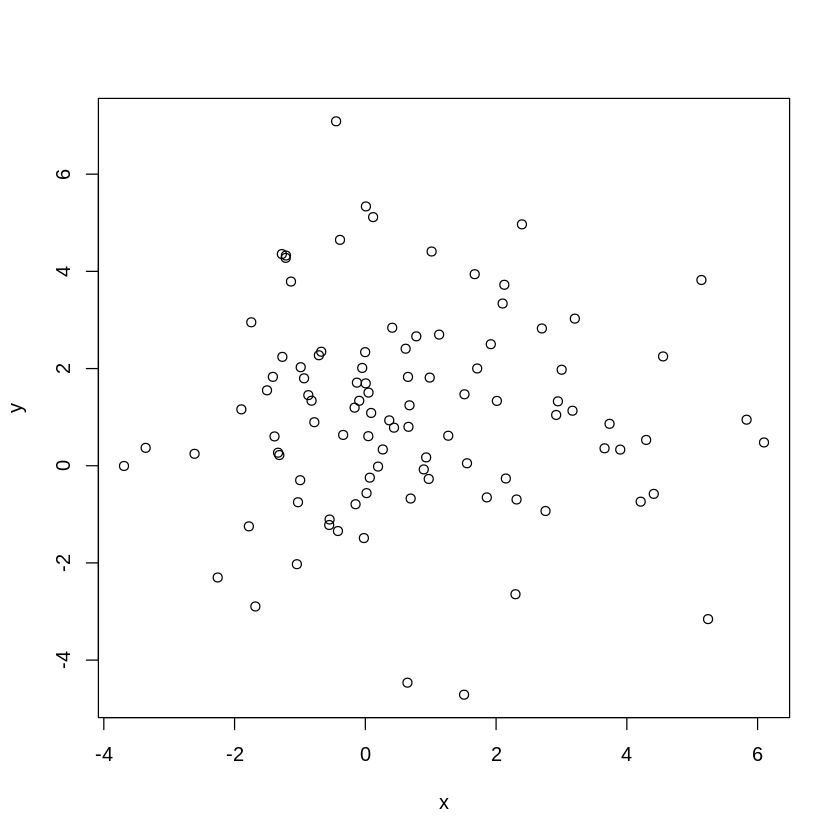

[1] 0.2672203

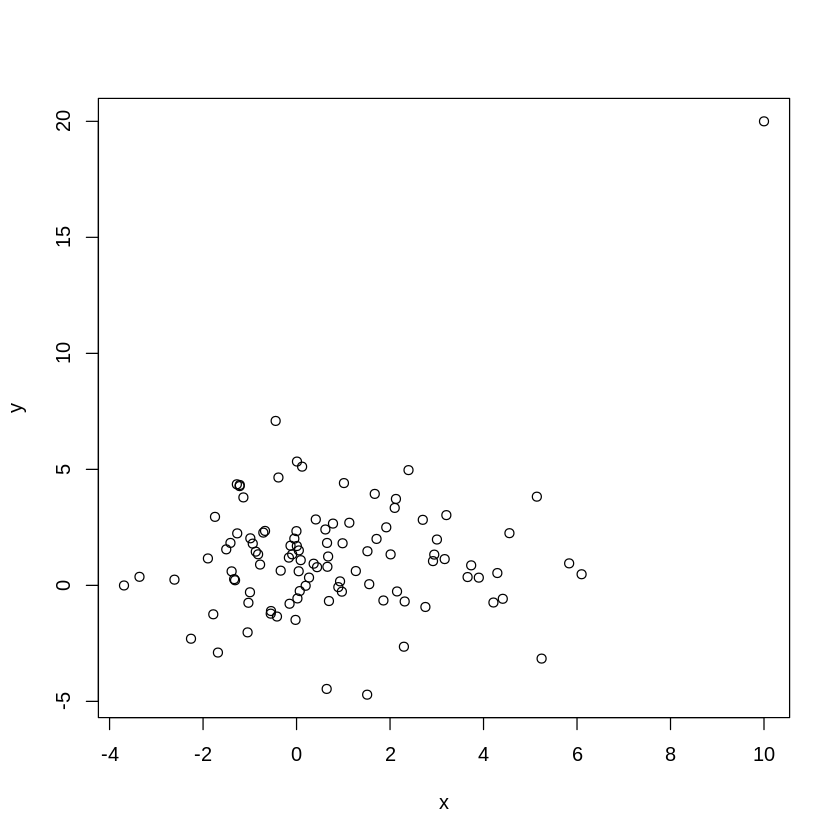

In [53]:
set.seed(1234)
x = rnorm(100, mean = 1, sd = 2)
y = rnorm(100, mean = 1, sd = 2)
plot(y ~ x)
cor(x,y)

x = c(x,10)
y = c(y,20)
plot(y ~ x)
cor(x,y)

**7.** Vygenerujte náhodné vektory `x` a `y` o veľkosti `100` hodnôt z normálneho rozdelenia so
`strednou hodnotou 1` a `štandardnou odchýlkou 2`. Vypočítajte korelačný koeficient a
zobrazte ich závislosť. Postupne vygenerujte nové hodnoty vo vektore `y` s rovnakým
stredom `1` ale zmenšujúcou sa štandardnou odchýlkou s hodnotami `2`, `1.5`, `1` a `0.5`. Pre
zmenené hodnoty `y` vypočítajte korelačný koeficient a zobrazte `X-Y` priebeh.

[1] -0.02538285

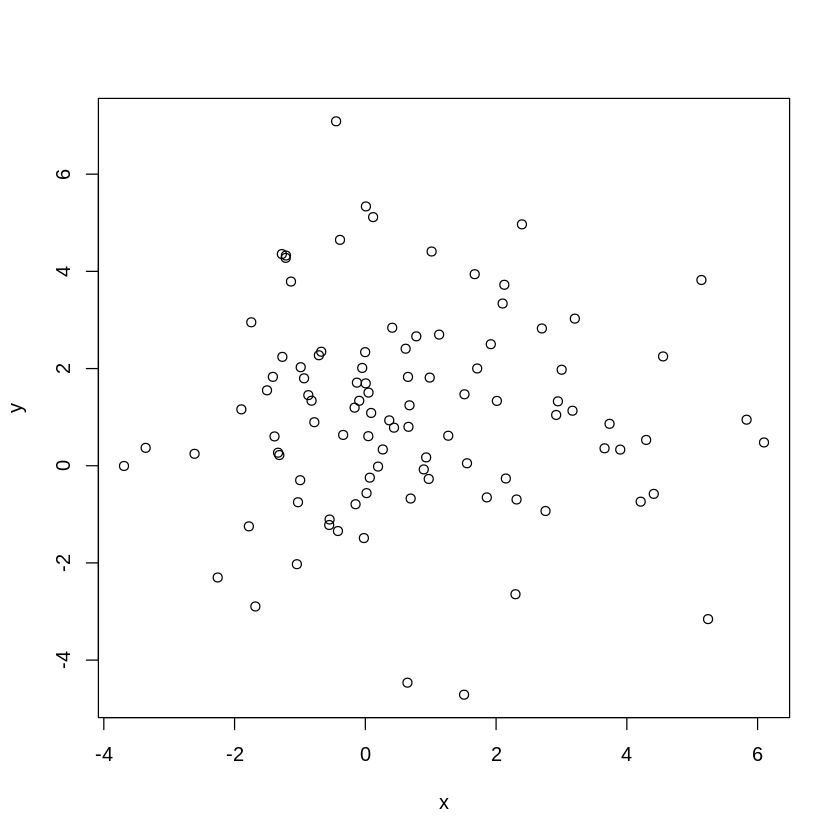

[1] 0.08181501

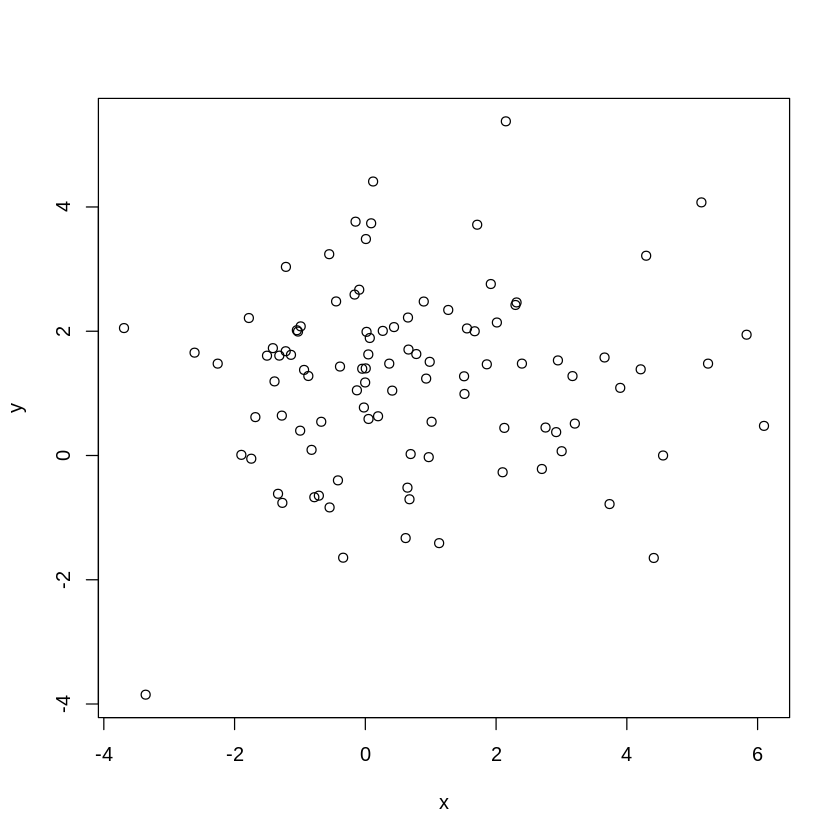

[1] 0.1415958

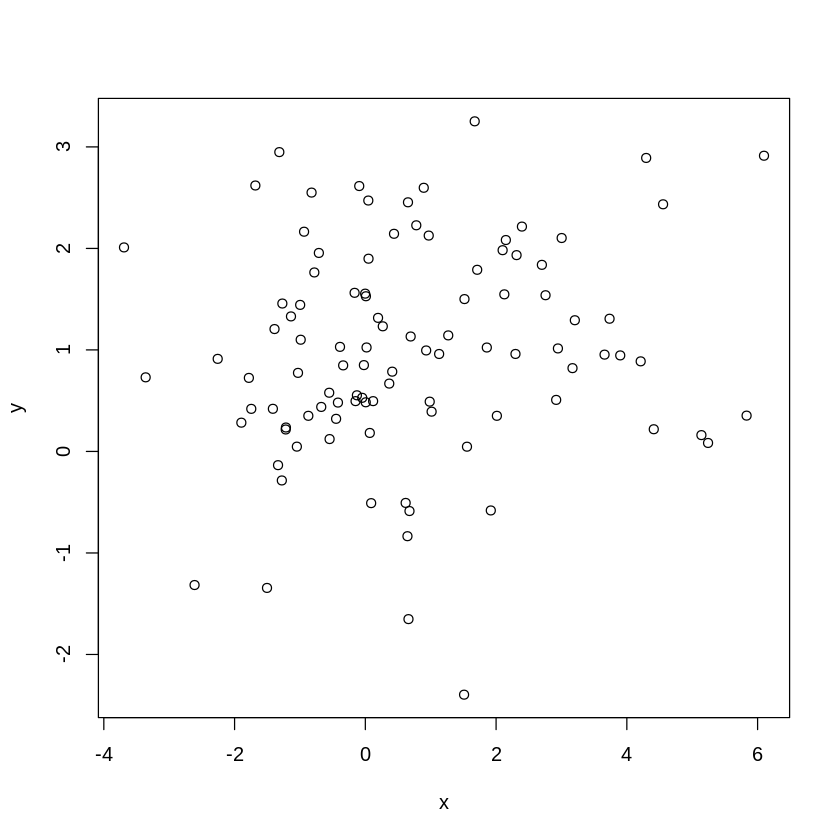

[1] -0.07061902

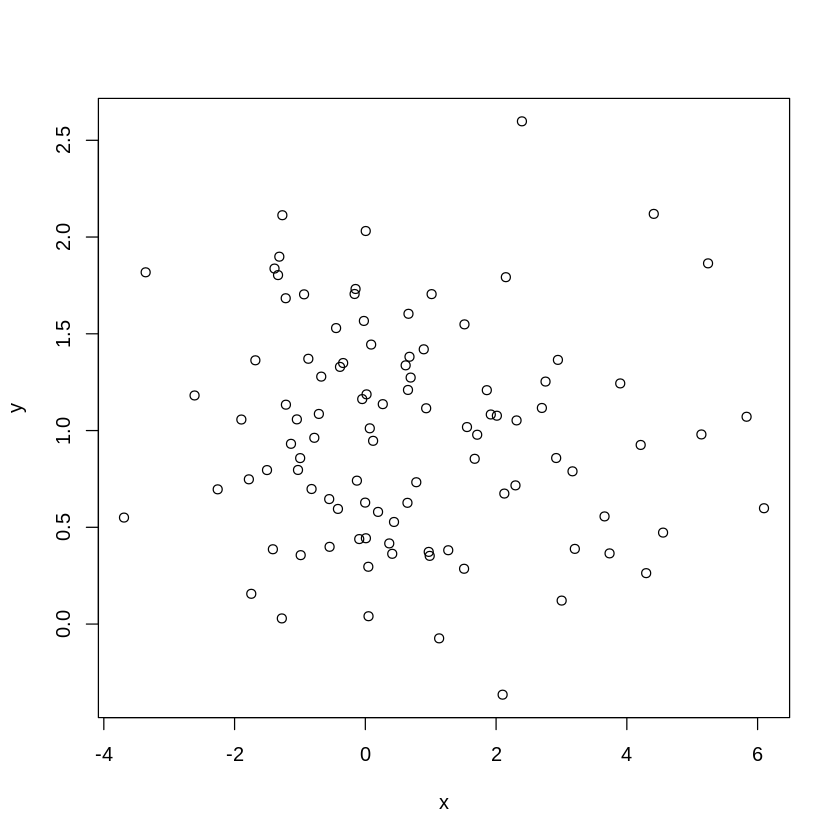

In [55]:
set.seed(1234)
x = rnorm(100, mean = 1, sd = 2)
y = rnorm(100, mean = 1, sd = 2)
plot(y ~ x)
cor(x,y)

y = rnorm(100, mean = 1, sd = 1.5)
plot(y ~ x)
cor(x,y)

y = rnorm(100, mean = 1, sd = 1)
plot(y ~ x)
cor(x,y)

y = rnorm(100, mean = 1, sd = 0.5)
plot(y ~ x)
cor(x,y)

**8.** Vygenerujete si sekvenciu dát `x` od `0` do `10` s krokom `0.5`. Pre vygenerované hodnoty `x`
vypočítajte hodnotu funkcie `y = 2.5x + 2` a pridajte k nej šum s normálnym rozdelením
s `0 strednou hodnotou` a `štandardnou odchýlkou 0.5`. Zobrazte priebeh funkcie na `X-Y`
grafe. Postupne pridávajte viac šumu s väčšou štandardnou odchýlkou `1`, `1.5`, `2.0`, `3.0`.
Po každej zmene zobrazte dáta a vypočítajte korelačný koeficient medzi `x` a `y`.

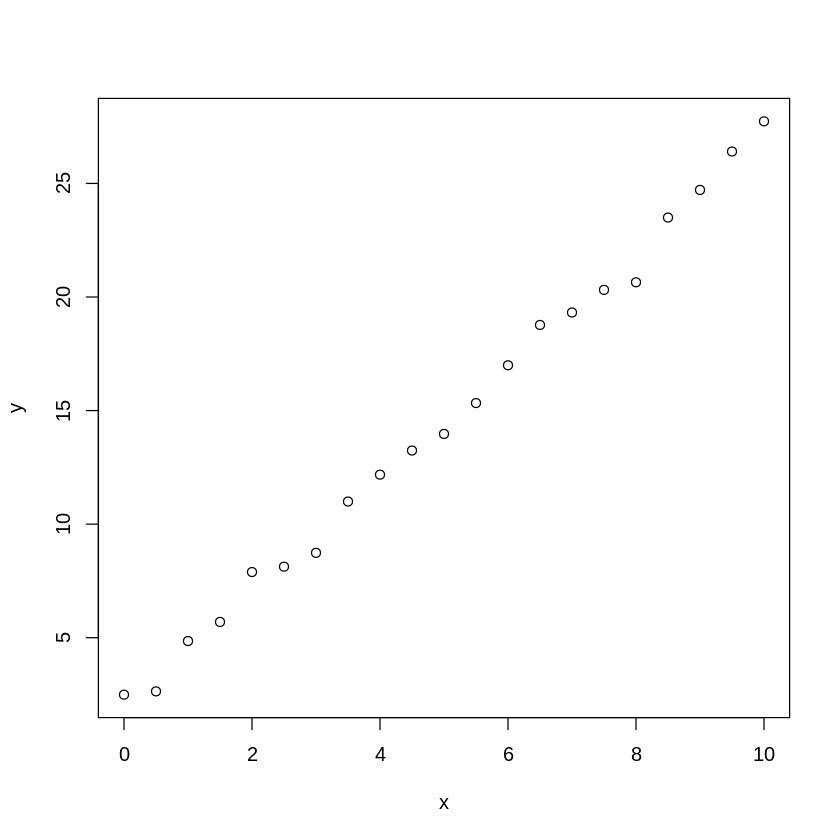

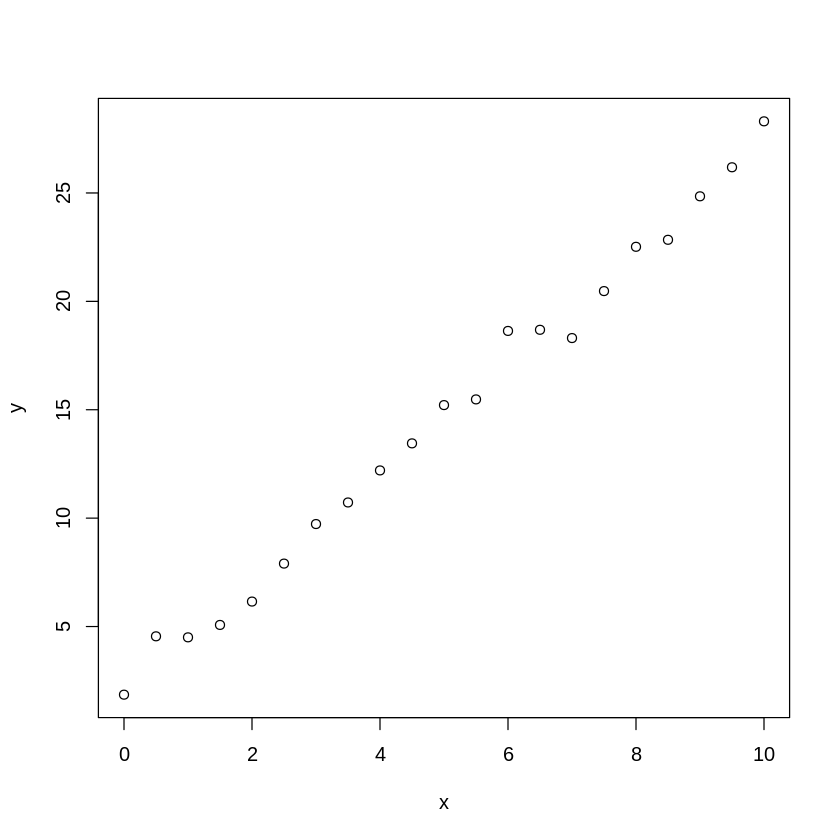

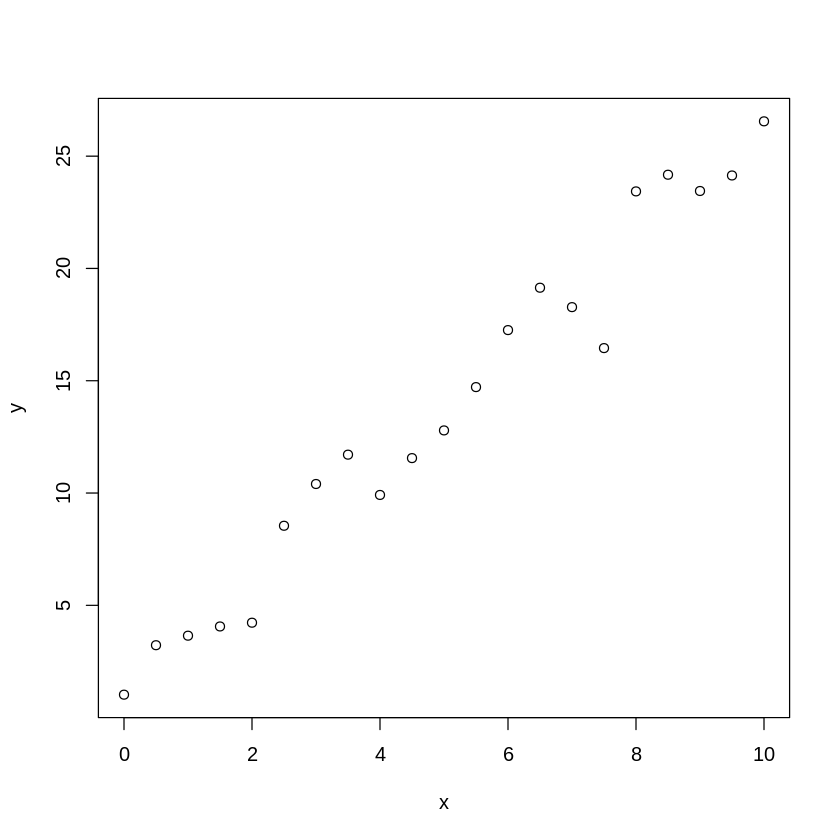

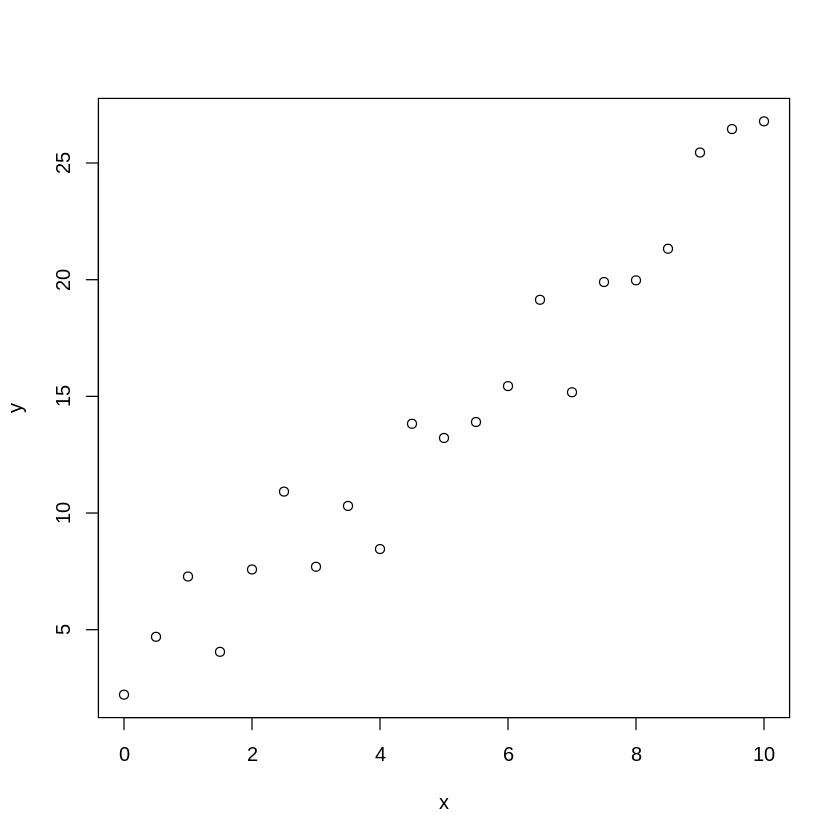

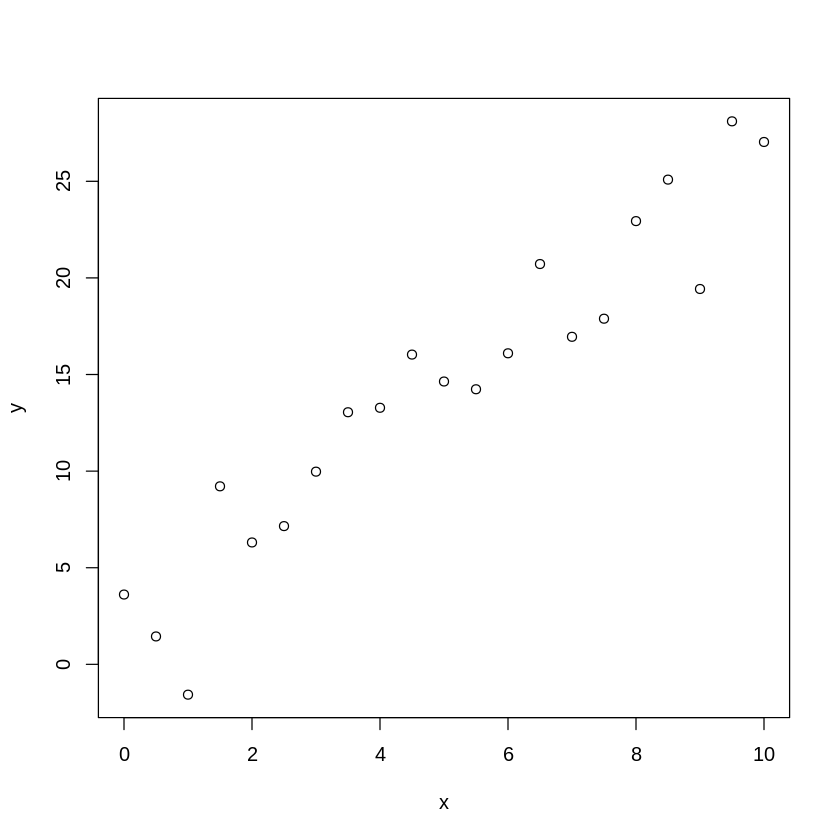

In [56]:
x = seq(0,10,0.5)
y = 2.5*x + 2
noise = rnorm(length(y), 0, 0.5)
y = y + noise
plot(y~x)

y = 2.5*x + 2
noise = rnorm(length(y), 0, 1)
y = y + noise
plot(y~x)

y = 2.5*x + 2
noise = rnorm(length(y), 0, 1.5)
y = y + noise
plot(y~x)

y = 2.5*x + 2
noise = rnorm(length(y), 0, 2)
y = y + noise
plot(y~x)

y = 2.5*x + 2
noise = rnorm(length(y), 0, 3)
y = y + noise
plot(y~x)

**9.** Vygenerujete si vektor `x` so `100` hodnotami z uniformného rozdelenia s `min 0` a `max 10`.
Pre vygenerované hodnoty `x` vypočítajte hodnotu funkcie `y = 2*sin(x) + x` a pridajte k
nej šum s normálnym rozdelením s `0 strednou hodnotou` a `štandardnou odchýlkou 0.1`.
Zobrazte priebeh funkcie na `X-Y` grafe a vypočítajte korelačný koeficient medzi `x` a `y`.

[1] 0.89712

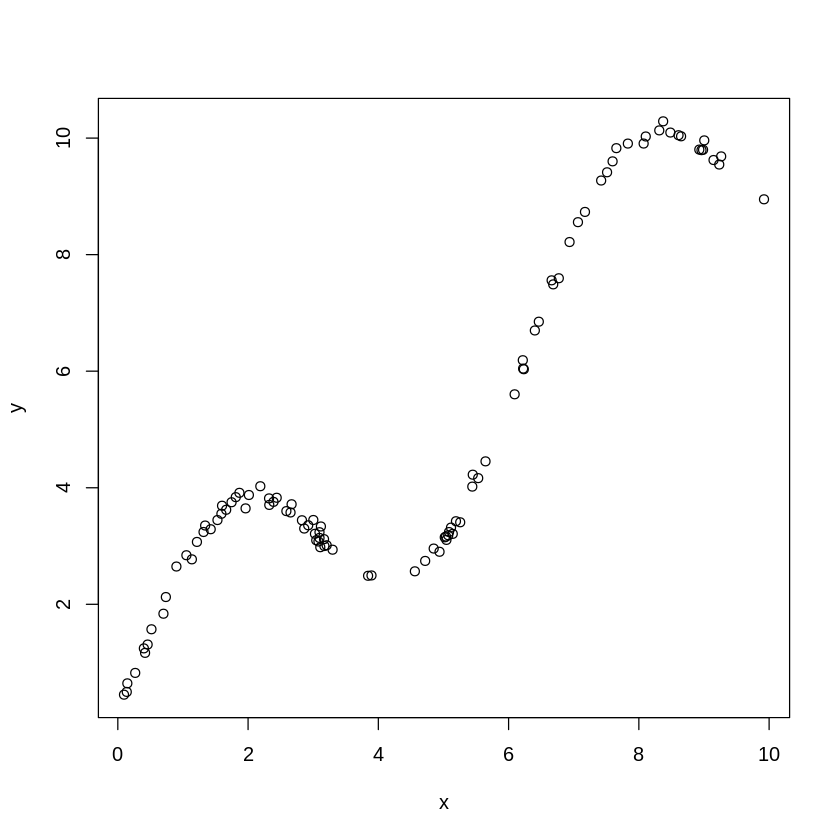

In [62]:
set.seed(1234)
x = runif(100,0,10)
y = 2*sin(x) + x
noise = rnorm(length(y), 0, 0.1)
y = y + noise

plot(y~x)
cor(x,y)